## Load data
The ca-GRQC data comes from [here](http://networkrepository.com/ca-GrQc.php#), using mmread funtion to load data.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.io import mmread
a = mmread('../data/ca-GrQc.mtx')

Note that, the .mtx file has a head line staring with %% or %. **a** is an object of scipy.sparse.coo_matrix.

We can directly convert scipy.sparse.coo_matrix to Graph object for networkx using nx.Graph(). G.number_of_nodes() shows the number of vetices, i.e., **order**. G.number_of_edges() shows the number of edges, i.e., **size**.

In [2]:
import networkx as nx
G=nx.Graph(a)
G.number_of_edges()
G.number_of_nodes()

13422

4158

The default node starts from 0, one can use relabel_nodes() to change the node labels. Below is the usage of relabel_nodes(), note that the mapping function.

In [3]:
mapping = dict(zip(G, range(1, G.number_of_nodes()+1)))
G = nx.relabel_nodes(G, mapping)
sorted(G)[:3]

[1, 2, 3]

Clearly, the node's label starts from 1.

In [4]:
nx.is_weighted(G)
nx.is_directed(G)

True

False

## Show the Graph

The graph **G** is too huge to display. Here, we first extract a subgraph, then show it.

In [5]:
node_degree_max = max(dict(G.degree()).items(), key=lambda x: x[1])
node_edges = G.edges(node_degree_max[0])


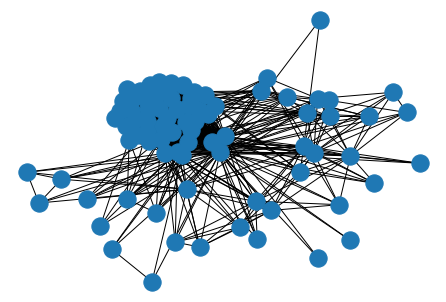

In [6]:
import numpy as np 
a = [n for n in G.neighbors(node_degree_max[0])]
a.append(node_degree_max[0])

H = G.subgraph(a)
import matplotlib.pyplot as plt 
nx.draw(H)


In [ ]:
# or using the subgraph method
node_sub = list(G.nodes())[:100]
a = nx.adjacency_matrix(H1)
print(a)
H1 = nx.subgraph(G, node_sub)
nx.draw(H1)
plt.show()

There is another example to find the node with largest degree, see [here](https://networkx.org/documentation/stable//auto_examples/drawing/plot_ego_graph.html#sphx-glr-auto-examples-drawing-plot-ego-graph-py)

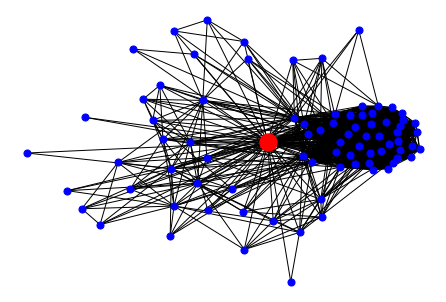

In [7]:
from operator import itemgetter
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)
# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

## Find all simple paths given start and target vertices

In [23]:
for path in nx.all_simple_paths(H, source=45, target=67, cutoff=3):
...     print(path)

[45, 67]
[45, 286, 473, 67]
[45, 286, 1945, 67]
[45, 286, 3348, 67]
[45, 385, 3348, 67]
[45, 437, 473, 67]
[45, 437, 530, 67]
[45, 437, 1924, 67]
[45, 437, 2978, 67]
[45, 437, 3348, 67]
[45, 437, 3614, 67]
[45, 473, 67]
[45, 473, 1945, 67]
[45, 473, 3348, 67]
[45, 473, 3614, 67]
[45, 473, 3744, 67]
[45, 918, 473, 67]
[45, 918, 3348, 67]
[45, 1092, 473, 67]
[45, 1092, 3348, 67]
[45, 1092, 3614, 67]
[45, 1092, 3744, 67]
[45, 1357, 473, 67]
[45, 1357, 2978, 67]
[45, 1357, 3348, 67]
[45, 1514, 473, 67]
[45, 1514, 1924, 67]
[45, 1514, 3348, 67]
[45, 1945, 67]
[45, 1945, 473, 67]
[45, 1945, 3348, 67]
[45, 1945, 3614, 67]
[45, 1945, 3744, 67]
[45, 2251, 473, 67]
[45, 2251, 530, 67]
[45, 2251, 1924, 67]
[45, 2251, 3348, 67]
[45, 2251, 3614, 67]
[45, 2251, 3744, 67]
[45, 2367, 3348, 67]
[45, 2367, 3614, 67]
[45, 2367, 3744, 67]
[45, 2555, 473, 67]
[45, 2555, 1945, 67]
[45, 2555, 3348, 67]
[45, 2754, 473, 67]
[45, 2754, 530, 67]
[45, 2754, 1924, 67]
[45, 2754, 3348, 67]
[45, 2754, 3614, 67]
[45,

In fact, this code finds all walks, the "path" in function name means walks. Let cutoff = 3 to reduce the volume of output. **Note that** A simple path in a graph is a nonempty sequence of nodes in which no node appears more than once in the sequence, and each adjacent pair of nodes in the sequence is adjacent in the graph.

## List all the shortes path

### k shortest/best paths between two nodes

In [27]:
from itertools import islice # based on algorithm by Jin Y. Yen(1971)
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
for path in k_shortest_paths(H, source=45, target=67, k=5):
    print(path)

[45, 67]
[45, 473, 67]
[45, 1945, 67]
[45, 3348, 67]
[45, 3614, 67]


In [28]:
print(nx.shortest_path(H, source=45, target=67)) # dijkstra method

[45, 67]


### Highlight any existing path

(-0.9141682868950483,
 1.091150870804526,
 -0.8335107373017142,
 1.0873100351096054)

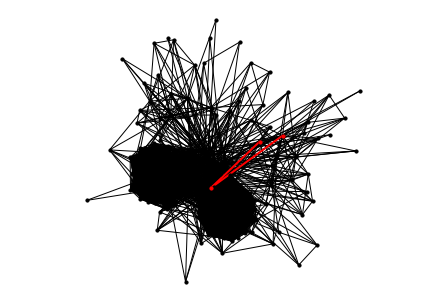

In [59]:
path = list([45, 3614, 67])
path_edges = list(zip(path,path[1:]))
nx.draw(H,node_size=10,node_color='k')
pos = nx.spring_layout(H)
nx.draw(H,pos,node_color='k',node_size=10)
nx.draw_networkx_nodes(H,pos,nodelist=path,node_color='r',node_size=10)
nx.draw_networkx_edges(H,pos,edgelist=path_edges,edge_color='r',width=2)
plt.axis('equal')
plt.show()

### Find the shortes path for any two nodes

In [68]:
source = 1
target = 3333
if nx.has_path(G,source,target): # judge the path existence
    print(nx.shortest_path(G, source=source,    target=target))
# another way for digraph
# from networkx.algorithms import tournament
# tournament.is_reachable(G,source,target)

[1, 19, 433, 2477, 817, 867, 3333]


### Connected

In [66]:
nx.is_connected(G)
nx.number_connected_components(G)

True

1

In [67]:
from networkx.algorithms.distance_measures import resistance_distance
resistance_distance(G, source, target) # compute the resistance distance

1.2937858675517482

In [71]:
from networkx.algorithms.distance_measures import diameter
diameter(G) # compute the diameter of a Graph

17

In [72]:
print(nx.shortest_path_length(G,source,target)) #compute the distance of two nodes

6
